In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K

import os
import cv2
from PIL import Image
import numpy as np

In [2]:
SIZE = 100
dataset = []
label = []

Autistic_images = os.listdir('C:/Users/ADMIN/Desktop/ASD Detection 1/Autism_data/test/Autistic/')
for image_name in (Autistic_images):
  image = cv2.imread('C:/Users/ADMIN/Desktop/ASD Detection 1/Autism_data/test/Autistic/'+image_name)
  image = Image.fromarray(image, 'RGB')
  image = image.resize((SIZE,SIZE))
  dataset.append(np.array(image))
  label.append(0)

In [3]:
Nonautistic_images = os.listdir('C:/Users/ADMIN/Desktop/ASD Detection 1/Autism_data/test/Non_Autistic/')
for image_name in (Autistic_images):
  image = cv2.imread('C:/Users/ADMIN/Desktop/ASD Detection 1/Autism_data/test/Non_Autistic/'+image_name)
  image = Image.fromarray(image, 'RGB')
  image = image.resize((SIZE,SIZE))
  dataset.append(np.array(image))
  label.append(1)

In [4]:
dataset = np.array(dataset)
label = np.array(label)

In [5]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
#from keras.utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(dataset, label,test_size = 0.20, random_state = 0)

#without scaling (normalize) the training may not converge.
#Normalization is a rescaling of the data from the original range
#so that all values are within the range of 0 and 1.
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [6]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
7/7 [==============================] - 7s 358ms/step - loss: 0.6775 - accuracy: 0.5893
Epoch 2/10
7/7 [==============================] - 2s 332ms/step - loss: 0.6021 - accuracy: 0.7188
Epoch 3/10
7/7 [==============================] - 2s 328ms/step - loss: 0.5024 - accuracy: 0.7857
Epoch 4/10
7/7 [==============================] - 2s 322ms/step - loss: 0.4271 - accuracy: 0.7991
Epoch 5/10
7/7 [==============================] - 2s 321ms/step - loss: 0.4465 - accuracy: 0.8304
Epoch 6/10
7/7 [==============================] - 2s 325ms/step - loss: 0.4043 - accuracy: 0.8125
Epoch 7/10
7/7 [==============================] - 2s 317ms/step - loss: 0.3222 - accuracy: 0.8527
Epoch 8/10
7/7 [==============================] - 2s 317ms/step - loss: 0.2878 - accuracy: 0.8661
Epoch 9/10
7/7 [==============================] - 2s 323ms/step - loss: 0.2273 - accuracy: 0.8973
Epoch 10/10
7/7 [==============================] - 2s 322ms/step - loss: 0.2070 - accuracy: 0.8973


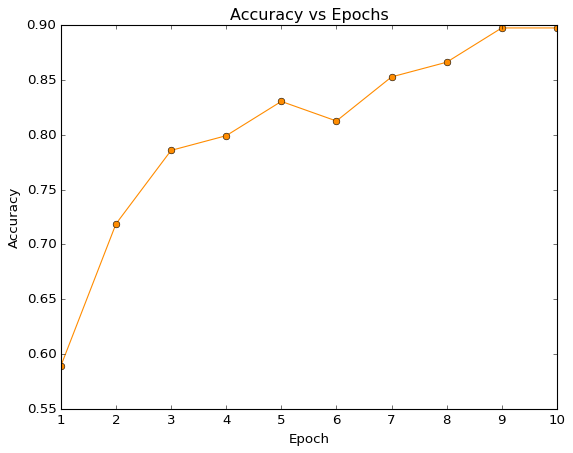

In [7]:
# Extract accuracy values and epochs from the history
accuracy = history.history['accuracy']
epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy vs epochs
plt.figure(facecolor='w')
plt.plot(epochs, accuracy, marker='o', color='#FF8C00')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

# Displaying the plot
plt.show()



In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


2/2 [==============================] - 0s 65ms/step - loss: 0.6936 - accuracy: 0.7500
Test loss: 0.6936342120170593
Test accuracy: 0.75


1/1 [==============================] - 0s 125ms/step
The prediction for this image is:  [[0.8644788]]
The actual label for this image is:  0


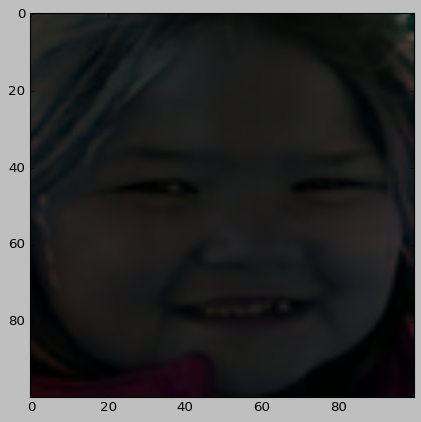

In [9]:
n=3
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

2/2 [==============================] - 0s 65ms/step


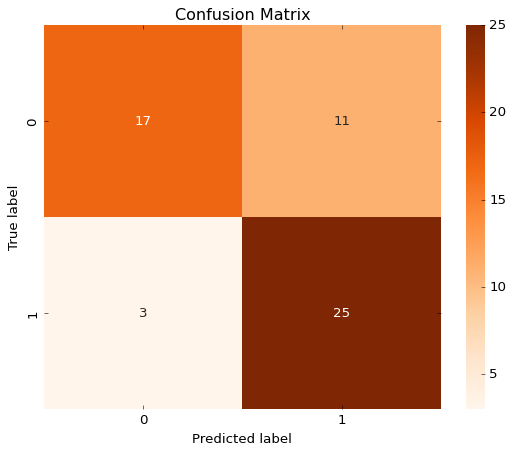

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate the model on test data
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred).flatten().astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')

# Adding labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Displaying the plot
plt.show()



In [11]:
# Save the trained model
model.save('asd_model.h5')